# Construction of the Machine
## Additional Libraries

In [1]:
import random
import time
import matplotlib.pyplot as plt
import sys
import os

## Importing Blocks
Let's import algorithms `NaiveEvaluation` and `HornerRule`.

In [2]:
# Add relative paths to module folders
sys.path.append(os.path.abspath("../1 NaiveEvaluation"))
sys.path.append(os.path.abspath("../2 HornerRule"))
sys.path.append(os.path.abspath("../img"))

from NaiveEvaluation import NaiveEvaluation
from HornerRule import HornerRule

## Execution Time Calculator
Calculates the execution time of an algorithm.

In [1]:
def ExecutionTime(fun, *args):
  start = time.time()
  fun(*args)
  end = time.time()
  return end - start

## Complexity Machine
Obtains the experimental times of an algorithm or the comparison time of two or more algorithm.

In [2]:
def ComplexityMachine(grades, reps, algorithm):
  total_times = [[] for _ in grades]
  for n in grades:
    current_time = [0 for _ in algorithm]
    for _ in range(reps):
      x = random.randint(-10, 10) #Value of x is not actually important
      coeff = [random.randint(-10, 10) for _ in range(n+1)] #Value of coefficients is not actually important
      for i, algo in enumerate(algorithm):
        current_time[i] += ExecutionTime(algo, coeff, x)
    for i, t in enumerate(current_time):
      total_times[i].append(t/reps)
  return total_times

# Experiment Block
## Comparison Graph
Line plot of the comparison time.

In [5]:
def ComparisonGraph(grades, t, algorithm):

  # Relative path to the 'img' folder from the notebook location
  img_path = os.path.join("..", "img")
  os.makedirs(img_path, exist_ok=True)

  # Create the plot
  for i, algo in enumerate(algorithm):
   plt.plot(grades, t[i], label = algo.__name__)
  plt.title(f'Comparison Graph')
  plt.xlabel("Polynomial grade (n)")
  plt.ylabel("Average time (s)")
  plt.legend(loc='upper left')

  # Save the graph to the 'img' folder
  filename = os.path.join(img_path, f"comparison_graph.png")
  plt.savefig(filename, bbox_inches="tight")
  print(f"Graph saved to: {filename}")

  plt.show()

## Complexity Graph
Line plot of the execution time of an algorithm.

In [6]:
def ComplexityGraph(grades, t, algorithm):

  # Relative path to the 'img' folder from the notebook location
  img_path = os.path.join("..", "img")
  os.makedirs(img_path, exist_ok=True)

  # Create the plot
  plt.plot(grades, t, label = algorithm.__name__)
  plt.title(f'Complexity Graph ({algorithm.__name__})')
  plt.xlabel("Polynomial grade (n)")
  plt.ylabel("Average time (s)")
  plt.legend(loc='upper left')

  # Save the graph to the 'img' folder
  filename = os.path.join(img_path, f"{algorithm.__name__}_complexity.png")
  plt.savefig(filename, bbox_inches="tight")
  print(f"Graph saved to: {filename}")

  plt.show()

## Machine Call
Chooses between both graphs.

In [7]:
def MachineCall(grades, reps, algorithm):
  t = ComplexityMachine(grades, reps, algorithm)
  if len(algorithm) == 1:
    algorithm = algorithm[0]
    t = t[0]
    ComplexityGraph(grades, t, algorithm)
  else:
    ComparisonGraph(grades, t, algorithm)

## NaiveEvaluation BigOh Visualization

Graph saved to: ..\img\NaiveEvaluation_complexity.png


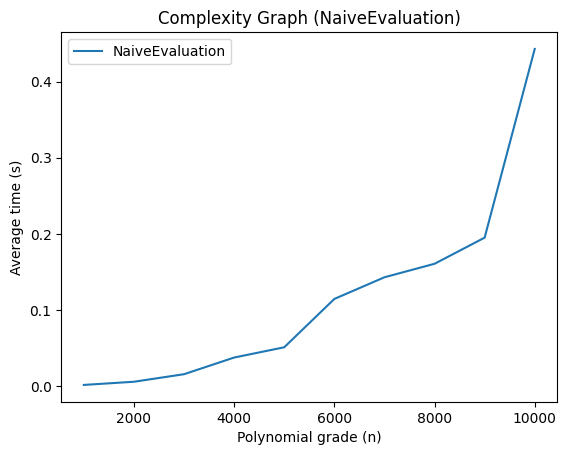

In [14]:
samples = 10
jump = 1000
grades = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [NaiveEvaluation]
MachineCall(grades, reps, algorithm)

### Analysis
In this graph we can observe the quadratic behavior of the algorithm.

## HornerRule BigOh Visualization

Graph saved to: ..\img\HornerRule_complexity.png


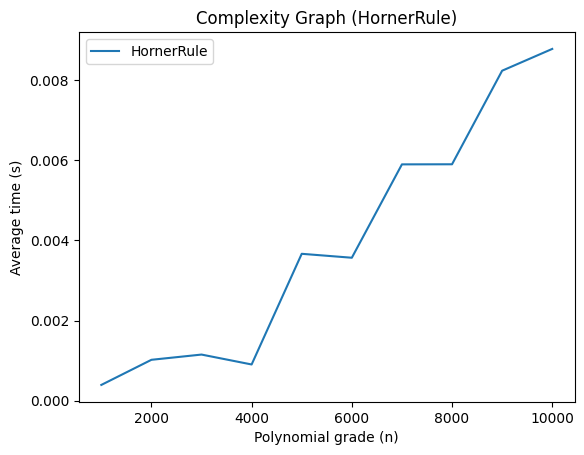

In [15]:
samples = 10
jump = 1000
grades = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [HornerRule]
MachineCall(grades, reps, algorithm)

### Analysis
In this graph we can observe the linear behavior of the algorithm.
## Comparing Algorithms

Graph saved to: ..\img\comparison_graph.png


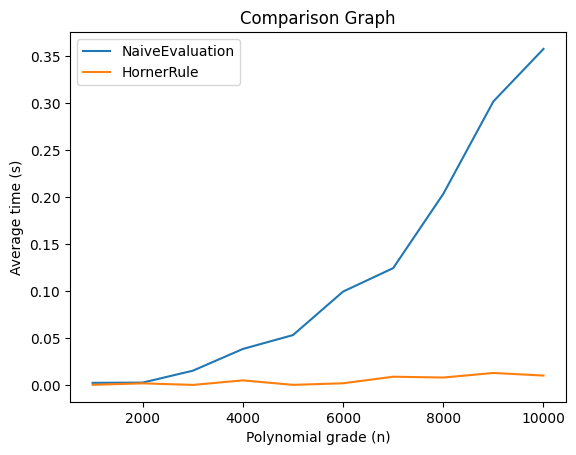

In [16]:
samples = 10
jump = 1000
grades = [i*jump for i in range(1, samples+1)]
reps = 10
algorithm = [NaiveEvaluation, HornerRule]
MachineCall(grades, reps, algorithm)

### Analysis
The graph shows the difference in execution time between the two algorithms. Horner's rule implies linear complexity (with a shorter execution time), while Naive Evaluation implies quadratic complexity, resulting in a very high execution time.
# Conclusions
The **comparison graph** clearly demonstrates that **Horner's Rule** is significantly more efficient than the naive method, especially for high-degree polynomials. This makes Horner’s Rule the preferred algorithm in practical applications involving polynomial evaluation.